# Train script for Advanced CNN VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../../Modules")
sys.path.append("../../Datasets")

# local imports
from train import train
from helpers import kl_loss,nll_loss,mse_loss,kl_loss_multi
from models import AdvancedCNNVAE
from ToyDatasets.timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 32
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = AdvancedCNNVAE(input_size=1,conv_size=256,latent_size=64,output_size=num_classes,use_softmax=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1] and test.shape[2] == num_classes)
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 845706
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=3)

## Run trainer


Train (1 2%) elbo: -1.1175 r_loss: -1.1175 kl: 6725.3170 aux_loss: 0.0000 beta 0.00e+00
Valid (1 2%) elbo: -0.4284 r_loss: -0.4284 kl: 22166.7910 aux_loss: 0.0000 beta 0.00e+00

Train (2 4%) elbo: -0.8143 r_loss: -0.5240 kl: 1422.4573 aux_loss: 0.0000 beta 2.04e-04
Valid (2 4%) elbo: -0.5463 r_loss: -0.4315 kl: 562.3547 aux_loss: 0.0000 beta 2.04e-04

Train (3 6%) elbo: -0.5619 r_loss: -0.4165 kl: 356.2132 aux_loss: 0.0000 beta 4.08e-04
Valid (3 6%) elbo: -0.6037 r_loss: -0.4746 kl: 316.2652 aux_loss: 0.0000 beta 4.08e-04

Train (4 8%) elbo: -0.5495 r_loss: -0.3857 kl: 267.4958 aux_loss: 0.0000 beta 6.12e-04
Valid (4 8%) elbo: -0.5465 r_loss: -0.3778 kl: 275.5694 aux_loss: 0.0000 beta 6.12e-04

Train (5 10%) elbo: -0.5689 r_loss: -0.3845 kl: 225.8488 aux_loss: 0.0000 beta 8.16e-04
Valid (5 10%) elbo: -0.6133 r_loss: -0.4411 kl: 210.9102 aux_loss: 0.0000 beta 8.16e-04

Train (6 12%) elbo: -0.5809 r_loss: -0.3804 kl: 196.5178 aux_loss: 0.0000 beta 1.02e-03
Valid (6 12%) elbo: -0.6000 r_


Train (47 94%) elbo: -0.9479 r_loss: -0.5707 kl: 40.1848 aux_loss: 0.0000 beta 9.39e-03
Valid (47 94%) elbo: -0.9669 r_loss: -0.5881 kl: 40.3479 aux_loss: 0.0000 beta 9.39e-03

Train (48 96%) elbo: -0.9512 r_loss: -0.5745 kl: 39.2787 aux_loss: 0.0000 beta 9.59e-03
Valid (48 96%) elbo: -0.9453 r_loss: -0.5673 kl: 39.4167 aux_loss: 0.0000 beta 9.59e-03

Train (49 98%) elbo: -0.9621 r_loss: -0.5802 kl: 38.9880 aux_loss: 0.0000 beta 9.80e-03
Valid (49 98%) elbo: -0.9917 r_loss: -0.5902 kl: 40.9842 aux_loss: 0.0000 beta 9.80e-03

Train (50 100%) elbo: -0.9592 r_loss: -0.5766 kl: 38.2621 aux_loss: 0.0000 beta 1.00e-02
Valid (50 100%) elbo: -1.0519 r_loss: -0.6751 kl: 37.6811 aux_loss: 0.0000 beta 1.00e-02


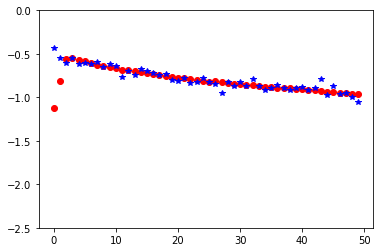

In [5]:
# use at least 50 iterations to get good results
train(data_loader,valid_data_loader,model,optimizer,scheduler,loss_fn=nll_loss,kl_loss_fn=kl_loss_multi,n_iters=50,use_softmax=True,max_beta=1e-2,print_every=1,plot_pred=False)

In [6]:
#torch.save(model.state_dict(),"../Saved_models/ToyDataset/CNNVAE_nll_map.pt")